In [1]:
#Importing the modules
import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from matplotlib import pyplot as plt
import sklearn.metrics as metrics
import pickle


#uploading data
dados = pd.read_csv('MatrizOffFlavors.csv', sep=';')

dados = dados.drop('Concatenate', axis=1)
dados = dados.drop('Brand Name', axis=1)

dados['Score'] = dados['Score'].apply(pd.to_numeric)
dados.head()

,Score,Estery,Body,Fresh,Tart,Sweet,Finish,Bitter,Sulfitic,Astringent,...,Freshly cut grass,Honey,Fruity: banana (Isoamyl acetate),Sweet corn (DMS),Sour,Rotten eggs (H2S),Sulfury: onion,Almond,Winey,Light-struck. skunky
0,8.0,2,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.0,2,0,3,0,2,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2,7.0,2,0,0,2,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,7.5,2,0,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7.0,2,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [2]:
'''
Definindo as funções de validar as váriaveis de treino e teste, executar o modelo e 
de métricas do modelo. De modo que eu não precise ficar refazendo o modelo todas as vezes

StratifieldShuffleSplit garante que vou ter amostras dos meus dois grupos
n_splits - uma divisão de conjuntos
test_size - tamanho do grupo de treino, costuma ser 10%
random_state = diminuir a aleatoriaedade
'''


def executar_validador(X,y):
  validador = StratifiedShuffleSplit(n_splits=1,test_size=0.1,random_state=0)
  for treino_id, teste_id in validador.split(X,y):
    X_train, X_test = X[treino_id], X[teste_id]
    y_train, y_test = y[treino_id], y[teste_id]
  return X_train, X_test, y_train, y_test


from sklearn import tree
def executar_classificador(classificador, X_train, X_test, Y_train):
  arvore = classificador.fit(X_train, Y_train)
  y_pred = arvore.predict(X_test)
  return y_pred

def validar_arvore(y_test, y_pred):
  print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
  

## Randon Forest 

In [3]:
#Execução validador
X = dados.drop('Score', axis=1).values
y= dados['Score'].values
X_train, X_test, y_train, y_test = executar_validador(X,y)



In [4]:
#Execução do modelo
classificador_random_forest = RandomForestRegressor(n_estimators=200,random_state=0, max_depth=10)
y_pred_random_forest = executar_classificador(classificador_random_forest, X_train, X_test,y_train)

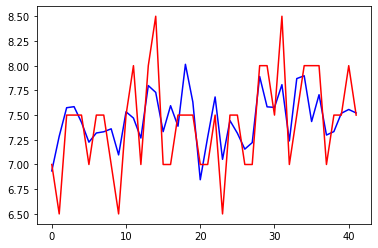

In [5]:
plt.plot(y_pred_random_forest, color = 'blue')
plt.plot(y_test, color = 'red')
plt.show()

In [6]:
validar_arvore(y_test,y_pred_random_forest)

0.3494791646506263


In [9]:
#Salvar modelo treinado
pickle.dump(classificador_random_forest, open(r'\Users\ITF\Desktop\BS_Score\BS_RandomForest_treinado\Modelo_treinado_BS.pkl','wb'))

In [ ]:
!ls